In [1]:
import os
import nltk
import regex as re
from nltk.tokenize import word_tokenize
import pickle
from PIL import Image, ImageDraw, ImageFont
import math
from scipy import spatial
import numpy as np
import requests
from tkinter import Y
import PIL
import io
import urllib
import json
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from scipy import spatial
import sklearn 
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans
import networkx as nx
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from datetime import datetime
from random import sample
import umap.umap_ as umap
import hdbscan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import keras
import sys
from bs4 import BeautifulSoup
import random
import glob

In [2]:
list_values = [1,2,4,8,16,32,64,128]
data_frame = pd.DataFrame()

place =  os.getcwd()        

In [3]:
#create relevant lists

dict_happened = {}
original_string = []
color_input = []
type_input = []
text_input = []
flavor_input = []
color_score = []
type_score = []
text_score = []
flavor_score = []


In [4]:
#find the sum of values
for a in list_values:
    for b in list_values:
        for c in list_values:
            for d in list_values:
                if a != 0 or b!= 0 or c !=0 or d!= 0:
                    string = f'modified_version3_co{a},ty{b},te{c},fl{d}'
                    file = open(f'{place}\\static\\test_user_input\\{string}_list.pickle','rb')
                    list_to_add = pickle.load(file)
                    file.close()
                    if f'{a}{b}{c}{d}' in dict_happened:
                        pass
                    else:
                        dict_happened[f'{a}{b}{c}{d}'] = True
                        original_string.append(string)
                        color_input.append(a)
                        type_input.append(b)
                        text_input.append(c)
                        flavor_input.append(d)
                        list_before = list_to_add[0]
                        list_after = list_to_add[2]
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[0],list_after[count][0])
                            sum = sum + difference
                        color_score.append(sum)
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[1],list_after[count][1])
                            sum = sum + difference
                        type_score.append(sum)
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[2],list_after[count][2])
                            sum = sum + difference
                        text_score.append(sum)
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[3],list_after[count][3])
                            sum = sum + difference
                        flavor_score.append(sum)

In [5]:
#input into dataframe

data_frame['Original_Scores'] = original_string
data_frame['Color_Input'] = color_input
data_frame['Type_Input'] = type_input
data_frame['Text_Input'] = text_input
data_frame['Flavor_Input'] = flavor_input
data_frame['Color_Score'] = color_score
data_frame['Type_Score'] = type_score
data_frame['Text_Score'] = text_score
data_frame['Flavor_Score'] = flavor_score


In [6]:
import openpyxl

data_frame.to_excel("output.xlsx",
             sheet_name='user_input_data')  

In [7]:
data_frame.head()

,Original_Scores,Color_Input,Type_Input,Text_Input,Flavor_Input,Color_Score,Type_Score,Text_Score,Flavor_Score
0,"modified_version3_co1,ty1,te1,fl1",1,1,1,1,3.226632,15.782056,253.580499,25.937614
1,"modified_version3_co1,ty1,te1,fl2",1,1,1,2,4.797885,21.191316,337.250662,9.220253
2,"modified_version3_co1,ty1,te1,fl4",1,1,1,4,4.437022,57.510133,376.617292,1.649511
3,"modified_version3_co1,ty1,te1,fl8",1,1,1,8,6.347450,74.649155,431.715415,1.828909
4,"modified_version3_co1,ty1,te1,fl16",1,1,1,16,9.518886,83.016611,707.738512,0.689587


In [8]:
data_frame.describe()

,Color_Input,Type_Input,Text_Input,Flavor_Input,Color_Score,Type_Score,Text_Score,Flavor_Score
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,32.106557,32.592982,32.595799,32.330943,129.247418,66.509371,499.255422,162.401514
std,41.673436,41.878936,41.877468,41.596492,242.626763,78.288737,354.432463,248.979034
min,1.000000,1.000000,1.000000,1.000000,0.068577,6.925981,51.635398,0.517323
25%,2.000000,2.000000,2.000000,2.000000,0.908664,19.994209,185.676690,4.823493
50%,8.000000,12.000000,16.000000,16.000000,9.020355,35.249080,377.364206,56.485473
75%,64.000000,64.000000,64.000000,64.000000,124.460316,80.333220,840.553933,181.722426
max,128.000000,128.000000,128.000000,128.000000,1245.064977,676.182288,1324.080379,1145.566771


In [9]:
print(data_frame.columns)
data_frame_smaller = data_frame[data_frame["Text_Input"] >= 1]

data_frame_smaller.describe()

Index(['Original_Scores', 'Color_Input', 'Type_Input', 'Text_Input',
       'Flavor_Input', 'Color_Score', 'Type_Score', 'Text_Score',
       'Flavor_Score'],
      dtype='object')


,Color_Input,Type_Input,Text_Input,Flavor_Input,Color_Score,Type_Score,Text_Score,Flavor_Score
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,32.106557,32.592982,32.595799,32.330943,129.247418,66.509371,499.255422,162.401514
std,41.673436,41.878936,41.877468,41.596492,242.626763,78.288737,354.432463,248.979034
min,1.000000,1.000000,1.000000,1.000000,0.068577,6.925981,51.635398,0.517323
25%,2.000000,2.000000,2.000000,2.000000,0.908664,19.994209,185.676690,4.823493
50%,8.000000,12.000000,16.000000,16.000000,9.020355,35.249080,377.364206,56.485473
75%,64.000000,64.000000,64.000000,64.000000,124.460316,80.333220,840.553933,181.722426
max,128.000000,128.000000,128.000000,128.000000,1245.064977,676.182288,1324.080379,1145.566771


      Color_Input  Color_Score  Type_Input  Type_Score  Text_Input   
0               1     3.226632           1   15.782056           1  \
1               1     4.797885           1   21.191316           1   
2               1     4.437022           1   57.510133           1   
3               1     6.347450           1   74.649155           1   
4               1     9.518886           1   83.016611           1   
...           ...          ...         ...         ...         ...   
3899          128     3.125456         128   14.717327         128   
3900          128     1.994318         128   22.282189         128   
3901          128     2.327652         128   11.145521         128   
3902          128     2.709787         128   18.466636         128   
3903          128     3.136335         128   12.627433         128   

      Text_Score  Flavor_Input  Flavor_Score  
0     253.580499             1     25.937614  
1     337.250662             2      9.220253  
2     376.617292  

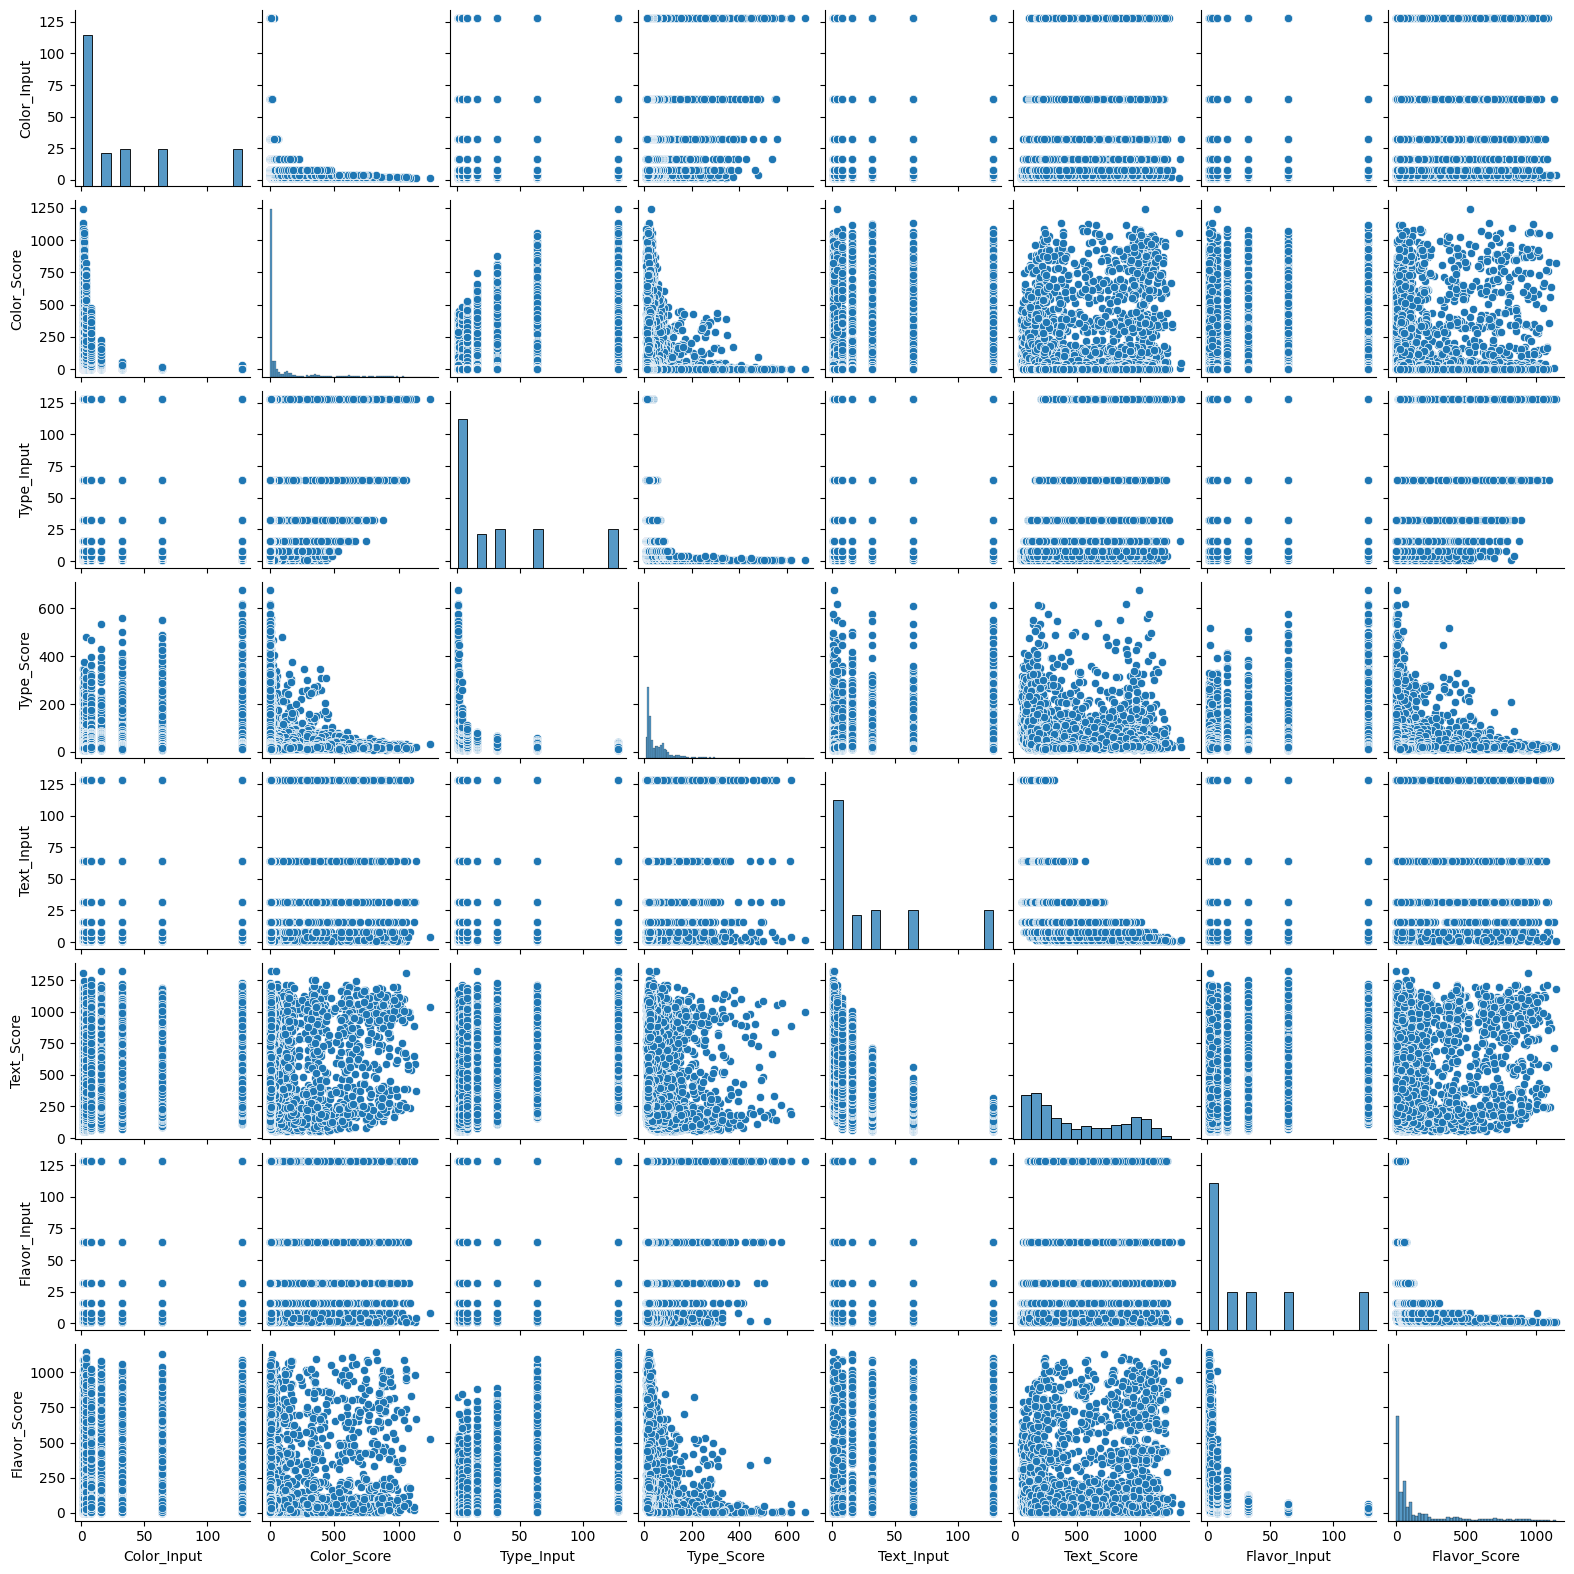

In [10]:
cols = ['Color_Input','Color_Score','Type_Input','Type_Score','Text_Input','Text_Score','Flavor_Input','Flavor_Score']
%matplotlib inline
import seaborn as sns
print(data_frame[cols])
sns.pairplot(data_frame[cols], height=2.0)
plt.show()

In [137]:
from sklearn.model_selection import train_test_split
cols_selected = ['Color_Input', 'Type_Input', 'Text_Input', 'Flavor_Input','Text_Score']
X = data_frame[cols_selected].iloc[:,0:4].values     
y = data_frame[cols_selected]['Text_Score']     

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [139]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

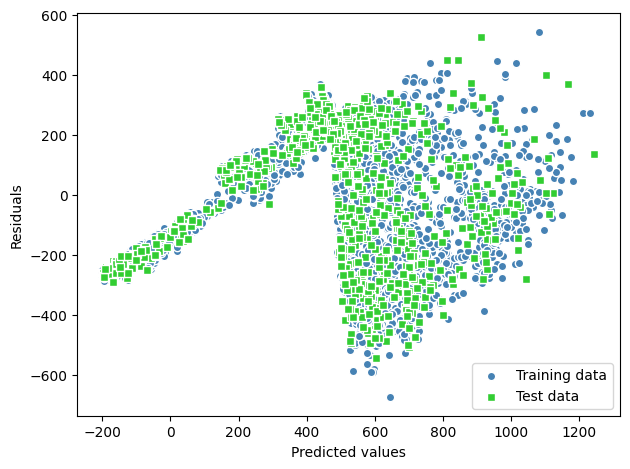

In [140]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
#plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
#plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

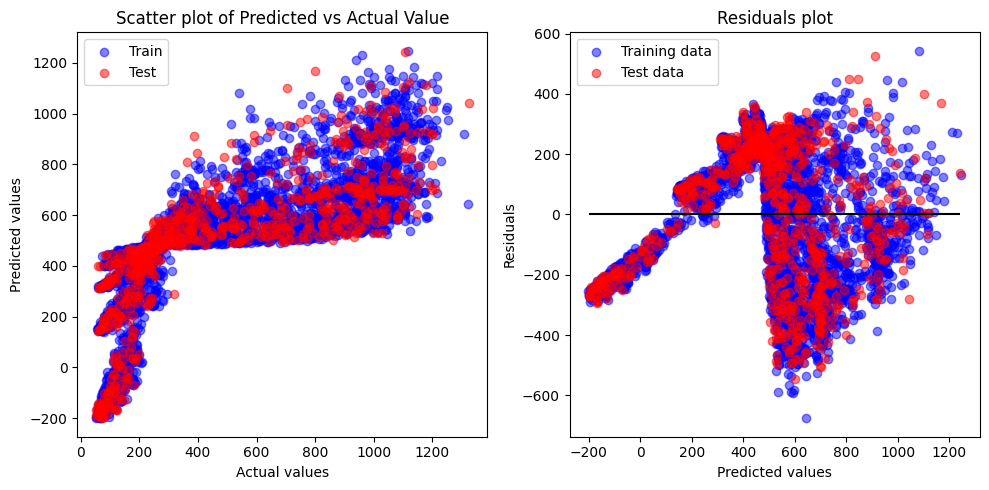

In [141]:
train_residuals = y_train_pred - y_train
test_residuals = y_test_pred - y_test

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, label='Train', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test', color='red', alpha=0.5)
plt.legend(loc='upper left')
plt.title('Scatter plot of Predicted vs Actual Value')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, train_residuals, label='Training data', color='blue', alpha=0.5)
plt.scatter(y_test_pred, test_residuals, label='Test data', color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), color='black')
plt.legend(loc='upper left')
plt.title('Residuals plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [142]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 47764.081, test: 51544.676
R^2 train: 0.622, test: 0.581


In [143]:
slr.fit(X_train, y_train).intercept_

476.93226287093125

In [144]:
slr.fit(X_train, y_train).coef_

array([ 1.03166346,  3.47196278, -5.34583097,  1.56280648])

In [145]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train.ravel())
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

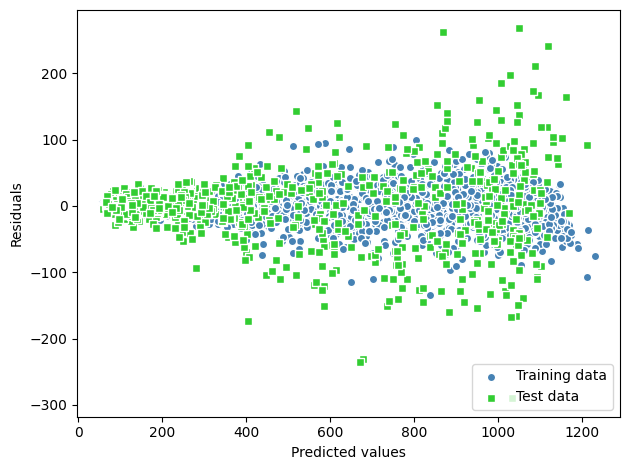

In [146]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [147]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# Print feature importance
importances = rf.feature_importances_
print("Feature importances:\n", importances)

MSE train: 472.454, test: 3322.243
R^2 train: 0.996, test: 0.973
Feature importances:
 [0.03689919 0.21695287 0.67570199 0.07044594]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
slr.fit(X_train, y_train).intercept_
slr.fit(X_train, y_train).coef_

In [148]:
list_means = []
mean_color_score = data_frame['Color_Score'].mean()
mean_color_score = mean_color_score - data_frame['Color_Score'].min()
list_means.append(mean_color_score)
mean_type_score = data_frame['Type_Score'].mean()
mean_type_score = mean_type_score - data_frame['Type_Score'].min()
list_means.append(mean_type_score)
mean_text_score = data_frame['Text_Score'].mean()
mean_text_score = mean_text_score - data_frame['Text_Score'].min()
list_means.append(mean_text_score)
mean_flavor_score = data_frame['Flavor_Score'].mean()
mean_flavor_score = mean_flavor_score - data_frame['Flavor_Score'].min()
list_means.append(mean_flavor_score)

In [149]:
max_mean = max(list_means)
new_scores = []
new_color_score_scaler = max_mean/mean_color_score
new_scores.append(new_color_score_scaler)
new_type_score_scaler = max_mean/mean_type_score
new_scores.append(new_type_score_scaler)
new_text_score_scaler = max_mean/mean_text_score
new_scores.append(new_text_score_scaler)
new_flavor_score_scaler = max_mean/mean_flavor_score
new_scores.append(new_flavor_score_scaler)

In [150]:
list_standard_deviations = []
standard_deviations_color_score = data_frame['Color_Score'].std()
list_standard_deviations.append(mean_color_score)
standard_deviations_type_score = data_frame['Type_Score'].std()
list_standard_deviations.append(mean_type_score)
standard_deviations_text_score = data_frame['Text_Score'].std()
list_standard_deviations.append(mean_text_score)
standard_deviations_flavor_score = data_frame['Flavor_Score'].std()
list_standard_deviations.append(mean_flavor_score)

In [151]:
print(new_scores)
both_scores = [new_scores,list_standard_deviations]
both_scores

[3.4651187603499083, 7.5124967340564766, 1.0, 2.76506323636867]


[[3.4651187603499083, 7.5124967340564766, 1.0, 2.76506323636867],
 [129.17884057139182,
  59.583390149772626,
  447.6200239041797,
  161.88419057353443]]

In [152]:
with open(f"static\\both_scores.pickle", "wb") as fp:
    pickle.dump(both_scores, fp)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the number of inputs and outputs
from sklearn.model_selection import train_test_split
cols_selected = ['Color_Input', 'Type_Input', 'Text_Input', 'Flavor_Input','Color_Score','Type_Score','Text_Score','Flavor_Score']

X = data_frame[cols_selected].iloc[:,0:4].values     
y = data_frame[cols_selected].iloc[:,5:8].values     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
n_inputs = 4
n_outputs = 4

# Create the model
inputs = Input(shape=(n_inputs,))
hidden1 = Dense(10, activation='relu')(inputs)
hidden2 = Dense(10, activation='relu')(hidden1)
outputs = Dense(n_outputs)(hidden2)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32)